In [2]:
import jsbsim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def printRed(skk): print(f"\033[91m {skk}\033[00m")
def printGreen(skk): print(f"\033[92m {skk}\033[00m")
def printLightPurple(skk): print(f"\033[94m {skk}\033[00m")
def printPurple(skk): print(f"\033[95m {skk}\033[00m")
def printCyan(skk): print(f"\033[96m {skk}\033[00m")
def printYellow(skk): print(f"\033[93m {skk}\033[00m")

In [2]:
printRed("Hello World")

 Hello World


In [92]:
fdm = jsbsim.FGFDMExec("./environments/jsbsim", None)
fdm.load_model("c172x")
fdm.get_property_catalog()



     JSBSim Flight Dynamics Model v1.1.13 Dec  3 2022 12:34:26
            [JSBSim-ML v2.0]

JSBSim startup beginning ...

Reading Aircraft Configuration File: Cessna C-172 Skyhawk II
                            Version: 2.0


This aircraft model is a BETA release!!!

This aircraft model probably will not fly as expected.

Use this model for development purposes ONLY!!!

  Description:   Models a 1982 Cessna 172P.
  Model Author:  Tony Peden
  Creation Date: 1999-01-01
  Version:       $Revision: 1.91 $

  Aircraft Metrics:
    WingArea: 174.0000
    WingSpan: 36.0000
    Incidence: 0.0000
    Chord: 4.9000
    H. Tail Area: 21.9000
    H. Tail Arm: 15.7000
    V. Tail Area: 16.5000
    V. Tail Arm: 15.7000
    Eyepoint (x, y, z): 37.0000 , 0.0000 , 48.0000
    Ref Pt (x, y, z): 43.2000 , 0.0000 , 59.4000
    Visual Ref Pt (x, y, z): 42.6000 , 0.0000 , 38.5000

  Mass and Balance:
    baseIxx: 948.0000 slug-ft2
    baseIyy: 1346.0000 slug-ft2
    baseIzz: 1967.0000 slug-ft2
    baseI


In file ./environments/jsbsim/systems/GNCUtilities.xml: line 68
      Property navigation/actual-heading-rad is already defined.


['inertial/sea-level-radius_ft (R)',
 'simulation/gravity-model (RW)',
 'simulation/integrator/rate/rotational (RW)',
 'simulation/integrator/rate/translational (RW)',
 'simulation/integrator/position/rotational (RW)',
 'simulation/integrator/position/translational (RW)',
 'simulation/write-state-file (W)',
 'simulation/channel-dt (R)',
 'simulation/gravitational-torque (RW)',
 'simulation/force-output (W)',
 'simulation/do_simple_trim (W)',
 'simulation/reset (W)',
 'simulation/disperse (R)',
 'simulation/randomseed (RW)',
 'simulation/terminate (RW)',
 'simulation/pause (RW)',
 'simulation/sim-time-sec (R)',
 'simulation/dt (R)',
 'simulation/jsbsim-debug (RW)',
 'simulation/frame (RW)',
 'simulation/trim-completed (RW)',
 'simulation/output/log_rate_hz (RW)',
 'simulation/output/enabled (RW)',
 'velocities/h-dot-fps (R)',
 'velocities/v-north-fps (R)',
 'velocities/v-east-fps (R)',
 'velocities/v-down-fps (R)',
 'velocities/u-fps (R)',
 'velocities/v-fps (R)',
 'velocities/w-fps (R)

In [28]:
data = pd.read_csv("./jsbsim/OUT737_TO.csv")

data

,Time,/fdm/jsbsim/simulation/sim-time-sec,/fdm/jsbsim/position/long-gc-rad,/fdm/jsbsim/position/lat-gc-rad,/fdm/jsbsim/position/h-sl-ft,/fdm/jsbsim/fcs/elevator-pos-deg,/fdm/jsbsim/fcs/throttle-cmd-norm,/fdm/jsbsim/fcs/throttle-cmd-norm[1]
0,0.0,0.0,2.032707,0.693809,12782.727404,0.000000,0.000000,0.000000
1,0.1,0.1,2.032704,0.693809,12782.729689,-2.746166,0.999346,0.999346
2,0.2,0.2,2.032701,0.693809,12782.735988,-2.828635,0.998013,0.998013
3,0.3,0.3,2.032698,0.693808,12782.743581,-2.907517,0.995999,0.995999
4,0.4,0.4,2.032695,0.693808,12782.748432,-2.985331,0.993241,0.993241
...,...,...,...,...,...,...,...,...
14996,1499.6,1499.6,1.996496,0.695833,24976.864987,-1.351971,0.852275,0.852275
14997,1499.7,1499.7,1.996491,0.695833,24977.862087,-1.352069,0.852282,0.852282
14998,1499.8,1499.8,1.996486,0.695834,24978.859187,-1.352167,0.852289,0.852289
14999,1499.9,1499.9,1.996481,0.695835,24979.856289,-1.352265,0.852296,0.852296


In [29]:
alt = data.values[:, [0, 4, 5, 6, 2, 3]]
alt

array([[ 0.00000000e+00,  1.27827274e+04,  0.00000000e+00,
         0.00000000e+00,  2.03270705e+00,  6.93808994e-01],
       [ 1.00000000e-01,  1.27827297e+04, -2.74616586e+00,
         9.99346021e-01,  2.03270407e+00,  6.93808827e-01],
       [ 2.00000000e-01,  1.27827360e+04, -2.82863482e+00,
         9.98013159e-01,  2.03270109e+00,  6.93808660e-01],
       ...,
       [ 1.49980000e+03,  2.49788592e+04, -1.35216732e+00,
         8.52289335e-01,  1.99648597e+00,  6.95834020e-01],
       [ 1.49990000e+03,  2.49798563e+04, -1.35226534e+00,
         8.52296356e-01,  1.99648087e+00,  6.95834722e-01],
       [ 1.50000000e+03,  2.49808534e+04, -1.35236331e+00,
         8.52303377e-01,  1.99647578e+00,  6.95835415e-01]])

In [30]:
alt[:, 0]

array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 1.4998e+03, 1.4999e+03,
       1.5000e+03])

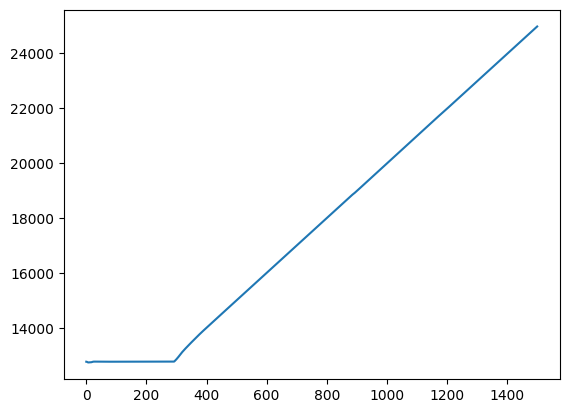

In [31]:
# autopilot altitude test
plt.plot(alt[:, 0][0:], alt[:, 1][0:])

plt.show()

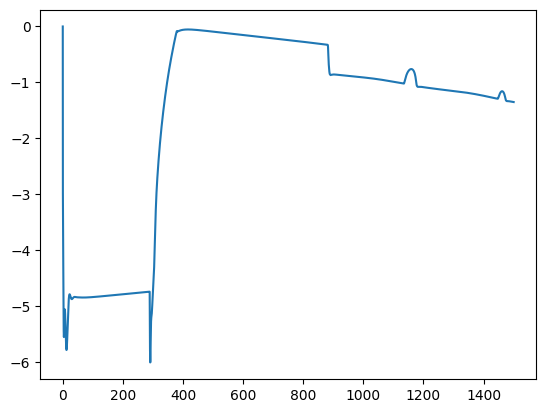

In [32]:
# elevator command for altitude test
plt.plot(alt[:, 0][0:], alt[:, 2][0:])
plt.show()

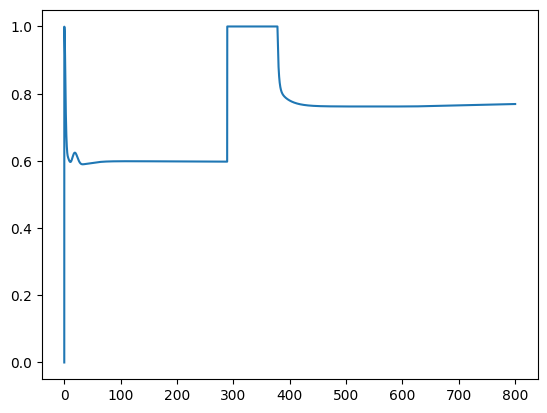

In [33]:
# throttle command with time plot for airspeed setpoint test
plt.plot(alt[:, 0][0:8001], alt[:, 3][0:8001])
plt.show()

In [34]:
import folium
path = []
for long, lat in zip(alt[:, 4][0:], alt[:, 5][0:]):
    path.append(np.rad2deg([lat, long]))
    
my_map = folium.Map(location=path[0], zoom_start=3)
folium.Marker(
    path[0],
    icon=folium.Icon(color="green", icon="info-sign"),
    popup="Starting point"
).add_to(my_map)
folium.Marker(
    path[-1],
    icon=folium.Icon(color="red", icon="info-sign"),
    popup="Ending point"
).add_to(my_map)

for i in range(len(path) - 1):
    folium.CircleMarker(path[i], radius=2, color="blue", fill=True, fill_color="blue").add_to(my_map)
    folium.PolyLine([path[i], path[i+1]], color="blue", weight=2.5, opacity=1).add_to(my_map)
    
my_map.save("sim_flight_path.html")

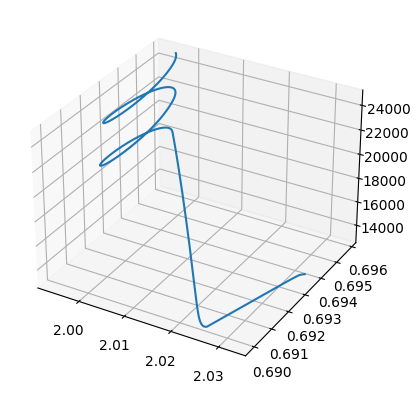

In [35]:
fig =plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(alt[:, 4][0:], alt[:, 5][0:], alt[:, 1][0:])
# plt.plot(alt[:, 0][0:8001], alt[:, 4][0:8001])
plt.show()